<a href="https://colab.research.google.com/github/sinchanaprabhakar/Design-and-Analysis-of-Algorithms-CSCI-6212-12/blob/main/DAA_Project1_Version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# Installing libraries that don't exist
%pip install --quiet numpy pandas matplotlib scipy pytest

In [24]:
# Importing
import math
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

In [25]:
# Algorithm implementation

def run_algorithm_counts_and_time(n: int):
    n = int(n)
    op_count = 0
    start = time.perf_counter()

    j = 5.0
    ln_n = math.log(n)
    # outer loop runs while j < log n
    while j < ln_n:
        k = 5.0
        while k < n:
            op_count += 1  # For counting operations
            k = k ** 1.5
        j = 1.2 * j

    elapsed = time.perf_counter() - start
    return op_count, elapsed


In [36]:
# Running for different n values

ns = [int(1e10), int(1e20), int(1e30), int(1e40), int(1e50), int(1e60), int(1e70)]
trials = 20  # number of repeats for better output

rows = []
for n in ns:
    times = []
    ops = []
    for t in range(trials):
        op_count, elapsed = run_algorithm_counts_and_time(n)
        times.append(elapsed)
        ops.append(op_count)
    rows.append({
        "n": n,
        "log_n": math.log(n),
        "op_count_mean": np.mean(ops),  # Experimental Value
        "op_count_std": np.std(ops),
        "time_mean": np.mean(times),
        "time_std": np.std(times),
        "theoretical": (math.log(math.log(n)))**2 if n>math.e else float('nan'),  # Theoretical value
    })

df = pd.DataFrame(rows)
df


,n,log_n,op_count_mean,op_count_std,time_mean,time_std,theoretical
0,10000000000,23.025851,63.0,0.0,0.000011,2.083842e-06,9.838370
1,100000000000000000000,46.051702,117.0,0.0,0.000013,9.434286e-07,14.667098
2,1000000000000000019884624838656,69.077553,150.0,0.0,0.000020,1.244923e-05,17.937172
3,10000000000000000303786028427003666890752,92.103404,160.0,0.0,0.000017,6.641637e-07,20.456732
4,1000000000000000076297698410918870032949649709...,115.129255,198.0,0.0,0.000023,4.983267e-06,22.525042
5,9999999999999999493871352970740188669636450110...,138.155106,209.0,0.0,0.000022,2.265799e-07,24.288900
6,1000000000000000072531436381529235126158374409...,161.180957,240.0,0.0,0.000026,1.285741e-06,25.832088


Fitted scaling constant C = 8.53305


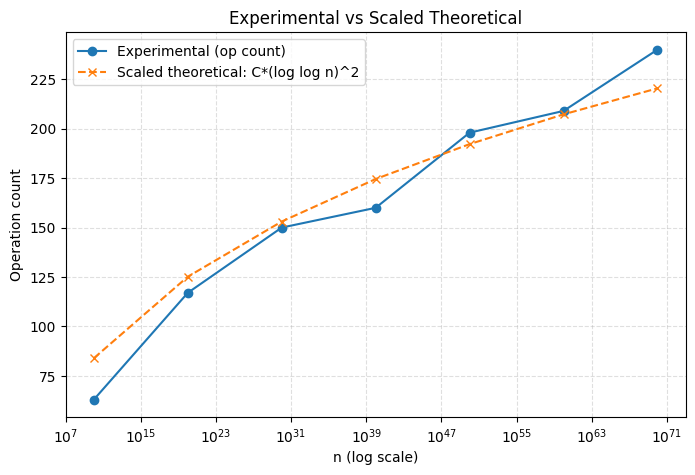

In [39]:
# Fitting a scaling constant C
# op_count_mean used as it's less noisy than time.

# remove null and negative theoretical values
mask = df['theoretical'].notna() & (df['theoretical'] > 0)
x = df.loc[mask, 'theoretical'].values
y = df.loc[mask, 'op_count_mean'].values

# Fitting C minimizing
C_hat = np.sum(x*y) / np.sum(x*x)

print(f"Fitted scaling constant C = {C_hat:.6g}")

# Plotting experimental (op_count) vs theoretical graph:
plt.figure(figsize=(8,5))
plt.plot(df['n'], df['op_count_mean'], marker='o', label='Experimental (op count)')
plt.plot(df['n'][mask], C_hat * df['theoretical'][mask], marker='x', linestyle='--', label=f'Scaled theoretical: C*(log log n)^2')
plt.xscale('log')   # plot n on log scale
plt.xlabel('n (log scale)')
plt.ylabel('Operation count')
plt.title('Experimental vs Scaled Theoretical')
plt.legend()
plt.grid(True, which='both', ls='--', alpha=0.4)
plt.show()



Normalization constant (C) = 8.178598


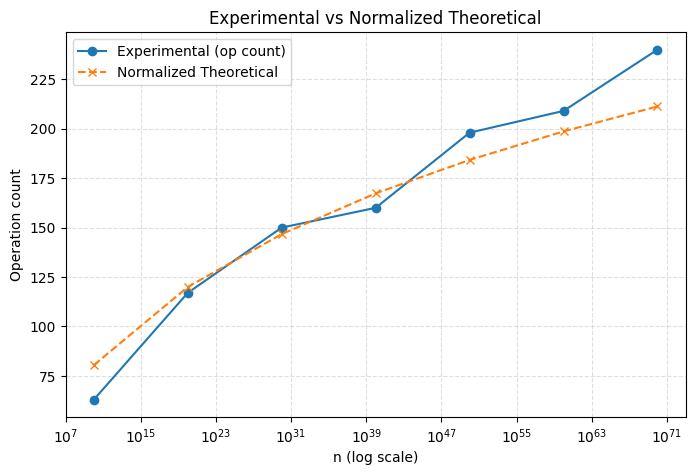

In [40]:
# Normalization
df['scaling_factor'] = df['op_count_mean'] / df['theoretical']
C_normalized = df['scaling_factor'].mean()  # average scaling factor

# Normalized theoretical values
df['normalized_theoretical'] = C_normalized * df['theoretical']

print(f"Normalization constant (C) = {C_normalized:.6f}")

# Plotting with normalization
plt.figure(figsize=(8,5))
plt.plot(df['n'], df['op_count_mean'], marker='o', label='Experimental (op count)')
plt.plot(df['n'][mask], df['normalized_theoretical'][mask], marker='x', linestyle='--',
         label='Normalized Theoretical')
plt.xscale('log')
plt.xlabel('n (log scale)')
plt.ylabel('Operation count')
plt.title('Experimental vs Normalized Theoretical')
plt.legend()
plt.grid(True, which='both', ls='--', alpha=0.4)
plt.show()
